# Building a Text Analysis Pipeline for Ancient Languages with CLTK

This workshop will introduce the Classical Language Toolkit, an open-source Python framework dedicated to text analysis and natural language processing for historical languages. Participants will be taken through the basic stages of a text analysis pipeline, namely corpus loading, preprocessing, sentence and word tokenization, lemmatization, part-of-speech and morphological tagging, prosody identification, and more. Examples will given primarily using Akkadian texts (and English translations), though some attention will be given to other languages supported by the project, including Latin and Ancient Greek. Participants are encouraged to bring their laptops; the demonstration can be followed along with interactively in a web browser without any installation or setup.

## Setup

In [1]:
import cltk
import os

from pprint import pprint

## Working with CLTK Corpora

### Installing Corpora

In [2]:
## Set up corpora

## You will need the models/datasets that the new lemmatizer uses
## Note that this will generate an error if this and older 
## version of this corpus is already installed. If that happens,
## backup the old version, move or delete it, and reimport the corpus.

from cltk.corpus.utils.importer import CorpusImporter

corpus_importer = CorpusImporter('akkadian')
corpus_importer.list_corpora

corpus_importer.import_corpus('cdli_corpus')

# This corpus syncs with CDLI's github account, which is backed-up daily.

### Loading a CLTK corpus

In [3]:
# Check and ensure that the Cuneiform Digital Library 
# corpus is imported.

parent_directory = os.path.dirname(os.getcwd())
file = os.path.join(parent_directory, 'cltk_data', 'akkadian', 
                    'atf', 'cdli_corpus', 'cdliatf_unblocked.atf')
os.path.isfile(file)

True

In [4]:
# Load corpus

from cltk.corpus.akkadian.file_importer import FileImport
from cltk.corpus.akkadian.cdli_corpus import CDLICorpus

fi = FileImport(file)
cc = CDLICorpus()

fi.read_file()
cc.parse_file(fi.file_lines)

## Corpus Data

In [5]:
## Examining available Metadata (unique to Akkadian).
#
# Depending on the information available from CDLI, you can
# generate the availability of their data. This example 
# shows that you can filter through texts that have available
# metadata, transliterations, normalizations and translation. 
# They're identified by their unique CDLI number (Pnum), 
# and edition (publication).
#
# Other filters include pnum, edition, metadata, transliteration, 
# normalization, and translation.
#
# Note, I'm utilizing 'normalization' because it
# pulls the least amount of data at once.

cc.print_catalog(catalog_filter=['normalization'])

Pnum: P223455
Edition: TIM 09, 072
Metadata: False
Transliteration: True
Normalization: True
Translation: True

Pnum: P251913
Edition: CUSAS 32, 068
Metadata: False
Transliteration: True
Normalization: True
Translation: True

Pnum: P252006
Edition: CUSAS 10, 11
Metadata: False
Transliteration: True
Normalization: True
Translation: True

Pnum: P254202
Edition: ARM 01, 001
Metadata: False
Transliteration: True
Normalization: True
Translation: True

Pnum: P254219
Edition: ARM 01, 018
Metadata: False
Transliteration: True
Normalization: True
Translation: True

Pnum: P254251
Edition: ARM 01, 050
Metadata: False
Transliteration: True
Normalization: True
Translation: True

Pnum: P254270
Edition: ARM 01, 069
Metadata: False
Transliteration: True
Normalization: True
Translation: True

Pnum: P254294
Edition: ARM 01, 093
Metadata: False
Transliteration: True
Normalization: True
Translation: True

Pnum: P254316
Edition: ARM 01, 115
Metadata: False
Transliteration: True
Normalization: True
Translat

### Additional tools

In [6]:
## For pulling all sorts of information via 'catalog'
#
## Print Catalog
# This is the most memory intensive, as it grabs all 
# known information from every text: metadata, pnum,
# edition, text, transliteration, normalization, and
# translation.

print(cc.catalog)

## Table of Contents
# Shortened form of catalog: pnum, edition, and 
# line length of text.

cc.toc()

## List CDLI number / Edition
# Shortest formation of this! Only pnums or editions.

cc.list_editions() ; cc.list_pnums()

## Tokenization

### Line, String Tokenizers

In [7]:
## Set up CLTK Latin word tokenizer
#
# The Akkadian tokenizer reads ATF material and converts 
# data into readable, mutable tokens. There is an option
# whether or not to preserve damage in the text.

from cltk.corpus.akkadian.tokenizer import Tokenizer
line_tokenizer = Tokenizer(preserve_damage=False)

In [8]:
## Select your text, we'll be choosing two:
#
# 1) Tuppi Tamgurti (Agreement text) from Nuzi
# 2) Taylor's Prism (Royal Inscription of Sennacherib)

nuzi = cc.catalog['P388524']['transliteration']
sennacherib = cc.catalog['P462830']['transliteration']

# Based on how CDLI structures its documents, we don't
# need line tokenizers all the time; however, the option is 
# there in case you're working with other documentation.

pprint(nuzi[0:8])
print()
pprint(sennacherib[0:8])
print()
print(f'There are {len(nuzi)} lines in Nuzi.')
print(f'There are {len(sennacherib)} lines in Sennacherib.')

['t,up-pi2 ta-am-gu-ur-ti',
 'sza {munus}a-wi-isz-na-a-a _dam_{at} {disz}ar#-zi-iz-za',
 'u3 sza {disz}sze-esz-wa-a-a _dumu_ ar-zi-iz-za',
 'it-ti {disz}a-ri-pe3-en-ni _ARAD2_ sza {munus#}tul2-pu-na-a-a',
 'i-na bi4-ri-szu-nu it-ta-am-ga5-ru#',
 '7(disz) _udu-hi-a-mesz_ 1(disz) _ansze-munus_ it-ti mu-ri#-szu-ma _munus_',
 '4(u) _ma-na urudu-mesz_ an-nu-tum {disz}ar-zi#-iz-za',
 'i-na _e2_ {munus}tul2-pu-na-a-a usz-te-s,i']

['{disz}{d}en-zu-szesz-mesz-eri-ba _lugal gal_-u2',
 '_lugal_ dan-nu _lugal_ kisz-sza2-ti _lugal kur_ asz-szur{ki}',
 '_lugal_ kib-rat _limmu2_-tim _re-e2-um_ it-pe-szu',
 'mi-gir _dingir-mesz gal-mesz_ na-s,ir kit-ti',
 "ra-'i-im mi-sza2-ri e-pisz u2-sa-a-ti",
 'a-lik tap-pu-ut a-ki-i sa-hi-ru dam-qa-a-ti',
 'et,-lum git2-ma-lum zi-ka-ru qar-du',
 "a-sza2-red kal mal-ki rap-pu la-'i-it,"]

There are 66 lines in Nuzi.
There are 500 lines in Sennacherib.


In [9]:
# Here's an example of damage erasure lines 19, 20 of our Nuzi document:

pprint(nuzi[18:20])
print()

# Putting it through our line tokenizer.

nuzi_sample = line_tokenizer.string_tokenizer('\n'.join(nuzi[18:20]))
pprint(nuzi_sample)

['[szum]-ma {munus}a-wi-isz-na-a-a [...] [{disz}]sze#-esz-wa-a-a',
 '[i]-na# _egir#_ {disz}a-ri-pe3-ni [...] [{munus}]szi#-da2#-an-ka4']

['szum-ma {munus}a-wi-isz-na-a-a ... {disz}sze-esz-wa-a-a',
 'i-na _egir_ {disz}a-ri-pe3-ni ... {munus}szi-da2-an-ka4']


### Word, Sign Tokenizers

In [10]:
# Unique to cuneiform languages, CLTK can additionally
# tokenize texts by their word count and, further,
# the cuneiform signs of which the words are composed.

from cltk.tokenize.word import WordTokenizer
word_tokenizer = WordTokenizer('akkadian')

# Word Tokenizers take strings, not lists.

nuzi_words = word_tokenizer.tokenize('\n'.join(nuzi[18:20]))
sennacherib_words = word_tokenizer.tokenize('\n'.join(sennacherib[0:1]))

pprint(nuzi_words)
print()
pprint(sennacherib_words)

[('[szum]-ma', 'akkadian'),
 ('{munus}a-wi-isz-na-a-a', 'akkadian'),
 ('[...]', 'akkadian'),
 ('[{disz}]sze#-esz-wa-a-a', 'akkadian'),
 ('[i]-na#', 'akkadian'),
 ('_egir#_', 'sumerian'),
 ('{disz}a-ri-pe3-ni', 'akkadian'),
 ('[...]', 'akkadian'),
 ('[{munus}]szi#-da2#-an-ka4', 'akkadian')]

[('{disz}{d}en-zu-szesz-mesz-eri-ba', 'akkadian'),
 ('_lugal', 'sumerian'),
 ('gal_-u2', 'sumerian')]


In [11]:
# Note that the tokenizers can differentiate between
# phonetic Akkadian and logographic Sumerian writing
# and we can confirm this with the sign tokenizer.

nuzi_sign = [word_tokenizer.tokenize_sign(x) 
             for x in nuzi_words]
sennacherib_sign = [word_tokenizer.tokenize_sign(x) 
                    for x in sennacherib_words]  
  
pprint(nuzi_sign[:5])
print()

# because the textual damage messes with our sign 
# readings, we'll have to turn it off.

[[('[szum]', 'akkadian'), ('ma', 'akkadian')],
 [('munus', 'determinative'),
  ('a', 'akkadian'),
  ('wi', 'akkadian'),
  ('isz', 'akkadian'),
  ('na', 'akkadian'),
  ('a', 'akkadian'),
  ('a', 'akkadian')],
 [('[...]', 'akkadian')],
 [('[', 'akkadian'),
  ('disz', 'determinative'),
  (']sze#', 'akkadian'),
  ('esz', 'akkadian'),
  ('wa', 'akkadian'),
  ('a', 'akkadian'),
  ('a', 'akkadian')],
 [('[i]', 'akkadian'), ('na#', 'akkadian')]]



In [12]:
# Nuzi was already edited in [9], so we'll tackle only Sennacherib.
sennacherib_sample = line_tokenizer.string_tokenizer('\n'.join(sennacherib))

nuzi_fixed = word_tokenizer.tokenize('\n'.join(nuzi_sample))
sennacherib_fixed = word_tokenizer.tokenize('\n'.join(sennacherib_sample[0:1]))

nuzi_signs = [word_tokenizer.tokenize_sign(x) for x in nuzi_fixed]
sennacherib_signs = [word_tokenizer.tokenize_sign(x) for x in sennacherib_fixed]  

pprint(nuzi_signs)
print()
pprint(sennacherib_signs)

# Here we can see some data trouble: Sennacherib's name is
# spelled with sumerian logograms, but our data did not account
# for this; our program isn't equipped to clean up data.

[[('szum', 'akkadian'), ('ma', 'akkadian')],
 [('munus', 'determinative'),
  ('a', 'akkadian'),
  ('wi', 'akkadian'),
  ('isz', 'akkadian'),
  ('na', 'akkadian'),
  ('a', 'akkadian'),
  ('a', 'akkadian')],
 [('...', 'akkadian')],
 [('disz', 'determinative'),
  ('sze', 'akkadian'),
  ('esz', 'akkadian'),
  ('wa', 'akkadian'),
  ('a', 'akkadian'),
  ('a', 'akkadian')],
 [('i', 'akkadian'), ('na', 'akkadian')],
 [('egir', 'sumerian')],
 [('disz', 'determinative'),
  ('a', 'akkadian'),
  ('ri', 'akkadian'),
  ('pe3', 'akkadian'),
  ('ni', 'akkadian')],
 [('...', 'akkadian')],
 [('munus', 'determinative'),
  ('szi', 'akkadian'),
  ('da2', 'akkadian'),
  ('an', 'akkadian'),
  ('ka4', 'akkadian')]]

[[('disz', 'determinative'),
  ('d', 'determinative'),
  ('en', 'akkadian'),
  ('zu', 'akkadian'),
  ('szesz', 'akkadian'),
  ('mesz', 'akkadian'),
  ('eri', 'akkadian'),
  ('ba', 'akkadian')],
 [('lugal', 'sumerian')],
 [('gal', 'sumerian'), ('u2', 'sumerian')]]


## Additional tools

In [24]:
# Further down the pipeline, we have a few smaller tests for normalized akkadian.

## Syllabifier

from cltk.stem.akkadian.syllabifier import Syllabifier

word = "epištašu"
syll = Syllabifier()
syll.syllabify(word)

## Decliner

from cltk.stem.akkadian.declension import NaiveDecliner

word = 'ilum'
decliner = NaiveDecliner()
decliner.decline_noun(word, 'm')

## Stresser

from cltk.phonology.akkadian.stress import StressFinder
stresser = StressFinder()
word = "šarrātim"
stresser.find_stress(word)

## Stems and Bound Forms
from cltk.stem.akkadian.stem import Stemmer
from cltk.stem.akkadian.bound_form import BoundForm
stemmer = Stemmer()
bound_former = BoundForm()
s_word = "ilātim"
b_word = "kalbim"
stemmer.get_stem(word, 'f')
bound_former.get_bound_form(word, 'm')

## Consonant Vowel Parser

from cltk.stem.akkadian.cv_pattern import CVPattern
cv_patterner = CVPattern()
word = "iparras"
cv_patterner.get_cv_pattern(word)

[('V', 1, 'i'),
 ('C', 1, 'p'),
 ('V', 2, 'a'),
 ('C', 2, 'r'),
 ('C', 2, 'r'),
 ('V', 2, 'a'),
 ('C', 3, 's')]

## Sample Text Analyses & Visualizations

### Sign Frequency Analysis

In [13]:
from cltk.stem.akkadian.atf_converter import ATFConverter
from collections import Counter

toto_signs = []

lines = [line_tokenizer.string_tokenizer(text, include_blanks=False)
        for text in nuzi]
words = [word_tokenizer.tokenize(line[0]) for line in lines]

for signs in words:
    individual_words = [word_tokenizer.tokenize_sign(a) for a in signs]
    individual_signs = [c for b in individual_words for c in b]
    for count in individual_signs:
        toto_signs.append(count)

frequency_analysis = Counter(toto_signs).most_common(15)
pprint(frequency_analysis)

[(('a', 'akkadian'), 85),
 (('na', 'akkadian'), 32),
 (('disz', 'determinative'), 26),
 (('dumu', 'sumerian'), 24),
 (('igi', 'sumerian'), 24),
 (('sze', 'akkadian'), 19),
 (('ni', 'akkadian'), 16),
 (('ri', 'akkadian'), 14),
 (('sza', 'akkadian'), 13),
 (('munus', 'determinative'), 13),
 (('i', 'akkadian'), 13),
 (('wa', 'akkadian'), 12),
 (('ma', 'akkadian'), 12),
 (('te', 'akkadian'), 11),
 (('wi', 'akkadian'), 10)]


### Counting Tokens

In [14]:
from collections import Counter

In [15]:
sennacherib_tokens = word_tokenizer.tokenize(
    '\n'.join(sennacherib_sample))
s_tokens = [word[0] for word in sennacherib_tokens]
word_count = Counter(s_tokens)

running = 0

print("Top 25 words in the Taylor's Prism:\n")
print("{number:>5}  {word:<12}     {count:<12}{percent:<12}{running:<12}". \
        format(number="", word="TOKEN", count="COUNT", percent="TOKEN %", running = "RUNNING %"))
for i, pair in enumerate(word_count.most_common(25)):
    running += pair[1]
    print("{number:>5}. {word:<12}      {count:<12}{percent:<12}{running:<12}". \
        format(number=i+1, word=pair[0], count=pair[1], \
        percent=str(round(pair[1] / len(s_tokens)*100, 2))+"%", running = str(round(running / len(s_tokens)*100, 2))+"%"))

Top 25 words in the Taylor's Prism:

       TOKEN            COUNT       TOKEN %     RUNNING %   
    1. i-na              88          3.41%       3.41%       
    2. sza               85          3.29%       6.71%       
    3. a-na              72          2.79%       9.5%        
    4. u3                57          2.21%       11.71%      
    5. la                33          1.28%       12.98%      
    6. _lugal_           21          0.81%       13.8%       
    7. a-di              20          0.78%       14.57%      
    8. qe2-reb           20          0.78%       15.35%      
    9. {d}asz-szur       15          0.58%       15.93%      
   10. ul-tu             15          0.58%       16.51%      
   11. ger-ri-ia         14          0.54%       17.05%      
   12. _kur_             14          0.54%       17.6%       
   13. {kur}elam-ma{ki}      11          0.43%       18.02%      
   14. asz-szur{ki}      10          0.39%       18.41%      
   15. asz2-lu-la        10   

### KWIC

In [16]:
### ANDREW
#
# There is some direct CLTK ways of doing some of the activities, but NLTK Text does a good job for showing
# things like KWIC, distribution plots; should work for your texts too
#
###

In [17]:
from nltk import Text

In [18]:
Sennacherib_Text = Text(s_tokens) # Note that Text takes a list of tokens as its input
Sennacherib_Text.concordance('_lugal_')

Displaying 21 of 21 matches:
 _lugal_ dan-nu _lugal_ kisz-sza2-ti _lugal 
 _lugal_ kisz-sza2-ti _lugal kur_ asz-szur{k
 _lugal_ kib-rat _limmu2_-tim _re-e2-um_ it-
r-ri-ia sza {disz}{d}mes-a-szum2-na _lugal_ {kur}kar2-{d}dun-ia2-asz3 a-di _eri
{kur}hat-ti lu al-lik {disz}lu-li-i _lugal_ {iri}s,i-du-un-ni pul-hi me-lam-me 
_giri3-min_-ia u3 {disz}s,i-id-qa-a _lugal_ {iri}is-qa-al-lu-na sza la ik-nu-sz
z}gigir-mesz ansze-kur-ra-mesz_ sza _lugal_ {kur}me-luh-hi e-mu-qi2 la ni-bi ik
a-di _{lu2}en {gesz}gigir-mesz_ sza _lugal_ {kur}me-luh-hi bal-t,u-su-un i-na _
u2 ab-tuq-ma a-na {disz}mi-ti-in-ti _lugal_ {iri}as-du-di {disz}pa-di-i _lugal_
_lugal_ {iri}as-du-di {disz}pa-di-i _lugal_ {iri}am-qar-ru-na u3 {disz}gissu-en
{iri}am-qar-ru-na u3 {disz}gissu-en _lugal_ {iri}ha-zi-ti ad-din-ma u2-s,a-ah-h
-me kar-mesz _ugu en_ sa-li-me-szu2 _lugal_ {kur}elam-ma{ki} na-mur-ra-tum at-b
a u2-ter-ma s,e-er {disz}ma-ni-ia-e _lugal_ {iri}uk-ki szad-da-a-a-e la kan-sze
gir-mesz_-szu2-nu u3 _ug3-mesz_ sza 

### Dispersion Plot

In [19]:
%matplotlib inline  
import matplotlib.pyplot as plt

In [20]:
Sennacherib_Text

<Text: {disz}{d}en-zu-szesz-mesz-eri-ba _lugal gal_-u2 _lugal_ dan-nu _lugal_ kisz-sza2-ti _lugal...>

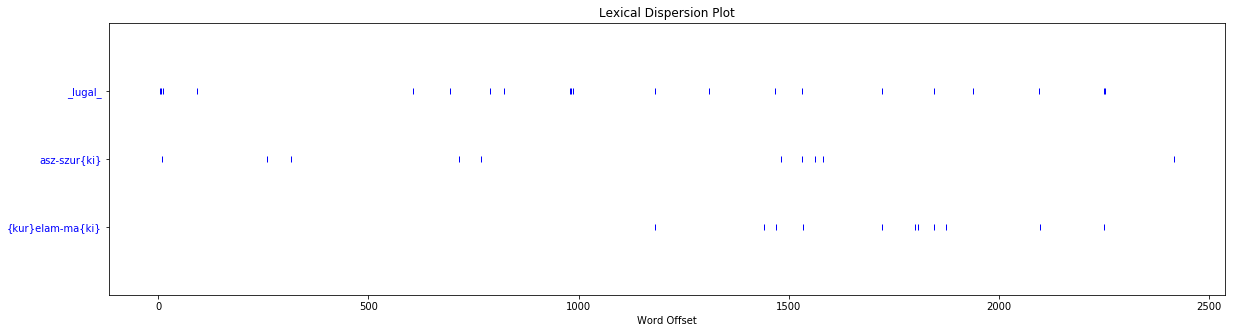

In [21]:
plt.figure(figsize=(20, 5))
Sennacherib_Text.dispersion_plot(['_lugal_', 'asz-szur{ki}', '{kur}elam-ma{ki}'])

### Do I need anything below this line?

In [ ]:
# Show books sorting problem

# aeneid_files = [file for file in files if "vergil/aen" in file]
# print(aeneid_files)

In [ ]:
# Fix books sorting problem

# aeneid_order = [int(" ".join(re.findall(r'\d+', item))) for item in aeneid_files]
# aeneid_files = [x for _, x in sorted(zip(aeneid_order, aeneid_files))]
# print(aeneid_files)

In [ ]:
# aeneid_pp = preprocess(ll.raw(aeneid_files))
# aeneid_tokens = word_tokenizer.tokenize(aeneid_pp)
# aeneid_lemmas = [x for _, x in lemmatizer.lemmatize(aeneid_tokens)]

# Error in lemmatizer; need to fix
# aeneid_lemmas = [lemma if lemma != 'dis-do' else 'dido' for lemma in aeneid_lemmas]

In [ ]:
# Dispersion plot of entire Aeneid

# aeneid_Text = Text(aeneid_tokens)
# plt.figure(figsize=(20, 5))
# aeneid_Text.dispersion_plot(['aeneas', 'uenus', 'dido'])

In [ ]:
# Lemmatized dispersion plot

# aeneid_Text = Text(aeneid_lemmas)
# plt.figure(figsize=(20, 5))
# aeneid_Text.dispersion_plot(['aeneas', 'uenus', 'dido'])

### Graphed Frequency Distribution

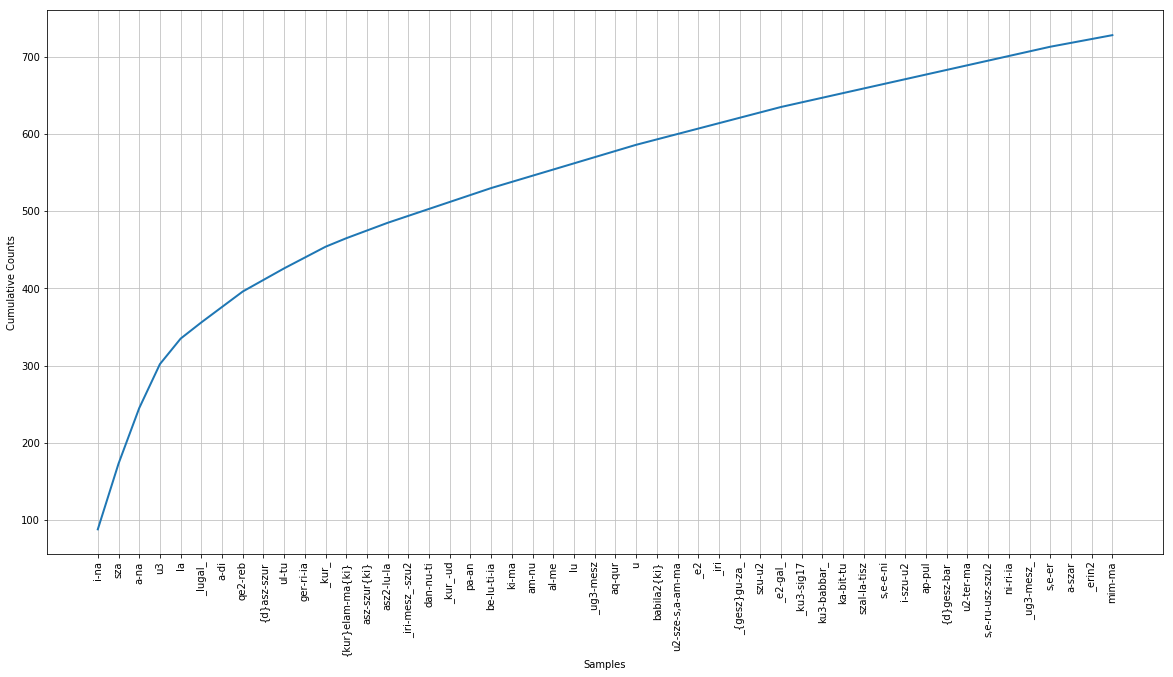

In [22]:
from nltk.probability import FreqDist

fdist = FreqDist(Sennacherib_Text)

plt.figure(figsize=(20, 10))
fdist.plot(50, cumulative=True)

## Working with other CLTK Languages

### Working with Ancient Greek in CLTK

In [ ]:
### ANDREW
#
# Keep this Greek unit; I will write a simplified version of the Latin demo before Friday
#
###

In [ ]:
import re
import requests

response = requests.get('https://raw.githubusercontent.com/tesserae/tesserae/master/texts/grc/homer.iliad/homer.iliad.part.1.tess')
iliad = response.text

In [ ]:
print(iliad[:100])

In [ ]:
iliad = re.sub(r'<.+?>\t', '', iliad)
print(iliad[:100])

In [ ]:
import unicodedata

iliad = unicodedata.normalize('NFC', iliad)

In [ ]:
from cltk.tokenize.word import WordTokenizer

word_tokenizer_greek = WordTokenizer('greek')
tokens = word_tokenizer_greek.tokenize(iliad)
print(tokens[:100])

In [ ]:
from cltk.tokenize.line import LineTokenizer

line_tokenizer = LineTokenizer('greek')
lines = line_tokenizer.tokenize(iliad)

In [ ]:
from cltk.tag.pos import POSTag
tagger = POSTag('greek')

tagger.tag_ngram_123_backoff(lines[0])

### Working with Akkadian in CLTK

In [ ]:
# In[1]: import os

from cltk.tokenize.word import WordTokenizer

word_tokenizer_akkadian = WordTokenizer('akkadian')

In [14]:
line = 'u2-wa-a-ru at-ta e2-kal2-la-ka _e2_-ka wu-e-er'
tokens = word_tokenizer_akkadian.tokenize(line)
pprint(tokens)

NameError: name 'word_tokenizer_akkadian' is not defined

In [ ]:
from cltk.stem.akkadian.syllabifier import Syllabifier

word = "epištašu"
syll = Syllabifier()
syll.syllabify(word)

In [ ]:
from cltk.stem.akkadian.declension import NaiveDecliner

word = 'ilum'
decliner = NaiveDecliner()
decliner.decline_noun(word, 'm')